In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Doublet Flow 

In [11]:
#Create gridspace
N=50
x_start,x_end,y_start,y_end = -2.0,2.0,-1.0,1.0
x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,N)
X,Y = np.meshgrid(x,y)

In [12]:
kappa = 1.0 #strength of Dublet
x_loc,y_loc = 0.0,0.0

In [28]:
def vel_profile(kappa,x_loc,y_loc,X,Y):
    
    u = -kappa/(2*np.pi) * ((X-x_loc)**2-(Y-y_loc)**2)/((X-x_loc)**2+(Y-y_loc)**2)**2
    
    v = -kappa/(2*np.pi) * 2*(X-x_loc)*(Y-y_loc)/((X-x_loc)**2+(Y-y_loc)**2)**2
    
    return u,v

def streamfunc(kappa,x_loc,y_loc,X,Y):
    
    psi = -kappa/(2*np.pi)*(Y-y_loc)/((X-x_loc)**2+(Y-y_loc)**2)
    
    return psi

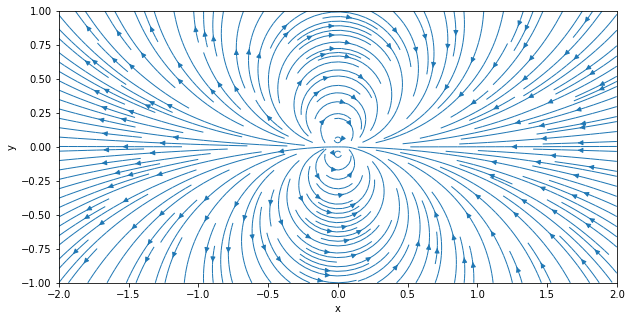

In [29]:
u_dub,v_dub = vel_profile(kappa,x_loc,y_loc,X,Y)
psi_dub = streamfunc(kappa,x_loc,y_loc,X,Y)

#plot streamlines
width = 10
height = (y_end-y_start) / (x_end-x_start) * width
plt.figure(figsize=(width,height))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(x_start,x_end)
plt.ylim(y_start,y_end)
plt.streamplot(X,Y,u_dub,v_dub,density=2,linewidth=1,arrowsize=1)

## Adding a freestream

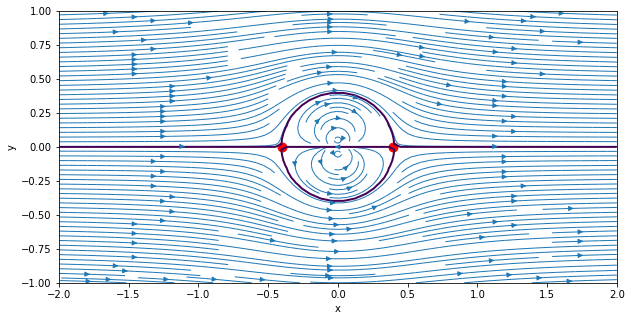

In [42]:
u_inf = 1.0

u_freestream = u_inf * np.ones((N,N), dtype = float)
v_freestream = np.zeros((N,N), dtype = float)
psi_freestream = u_inf * Y

u = u_dub + u_freestream
v = v_dub + v_freestream
psi = psi_dub + psi_freestream

#stagnation points
x_stag1,y_stag1 = np.sqrt(kappa/(2*np.pi*u_inf)),0.0
x_stag2,y_stag2 = -np.sqrt(kappa/(2*np.pi*u_inf)),0.0

width = 10
height = (y_end-y_start) / (x_end-x_start) * width
plt.figure(figsize=(width,height))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(x_start,x_end)
plt.ylim(y_start,y_end)
plt.streamplot(X,Y,u,v,density=2,linewidth=1,arrowsize=1)
plt.contour(X,Y,psi,levels=[0.],linewidths=2)

plt.scatter([x_stag1,x_stag2],[y_stag1,y_stag2],color = 'r',s=80)


## Pressure Coefficient

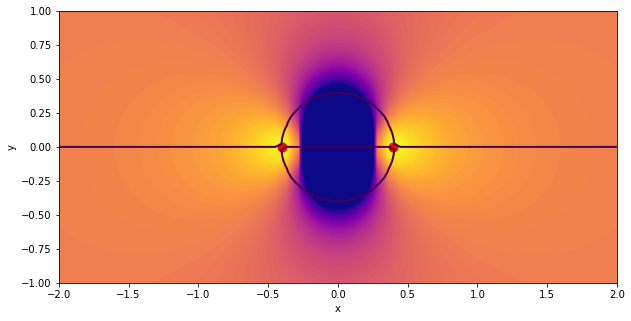

In [63]:
#pressure coefficient field

Cp = 1.0 - (u**2 + v**2)/(u_inf**2)
levels = np.linspace(-2.0,1, 100)

width = 10
height = (y_end-y_start) / (x_end-x_start) * width
plt.figure(figsize=(width,height))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(x_start,x_end)
plt.ylim(y_start,y_end)

plt.contourf(X,Y,Cp,levels=levels,cmap = 'plasma',extend='both')
plt.contour(X,Y,psi,levels=[0.],linewidths=2)
plt.scatter([x_stag1,x_stag2],[y_stag1,y_stag2],color = 'r',s=80)

-5749.2531634180232